# CNN Model trained on CIFAR-10 Dataset

In [1]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')
%matplotlib inline

# Defining the parameters
batch_size = 32
num_classes = 10
epochs = 50

In [2]:
# Splitting the data between train and test
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170508288/170498071 [==============================] - 11s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


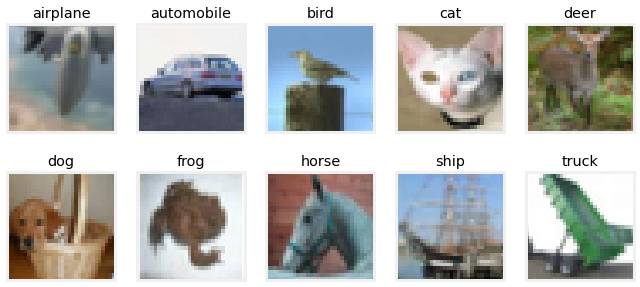

In [3]:
# plotting some random 10 images

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(10,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [4]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [5]:
# Building the CNN Model (Hidden Output)

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [8]:
# summary of the model (Hidden Input)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0

In [9]:
# compile (Hidden Output)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255

epochs=50

# Training the model
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 18s 6ms/step - loss: 8.5244 - accuracy: 0.4260 - val_loss: 6.2284 - val_accuracy: 0.5514
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 4.9695 - accuracy: 0.5622 - val_loss: 3.8016 - val_accuracy: 0.6220
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 3.0990 - accuracy: 0.6367 - val_loss: 2.6304 - val_accuracy: 0.6333
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0851 - accuracy: 0.6853 - val_loss: 2.0179 - val_accuracy: 0.6299
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5338 - accuracy: 0.7199 - val_loss: 1.3824 - val_accuracy: 0.7230
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2356 - accuracy: 0.7387 - val_loss: 1.1907 - val_accuracy: 0.7311
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0663 - accuracy: 0.7604 - val_loss: 1.1457 - val_accuracy

# Predictions Using The CNN Model:


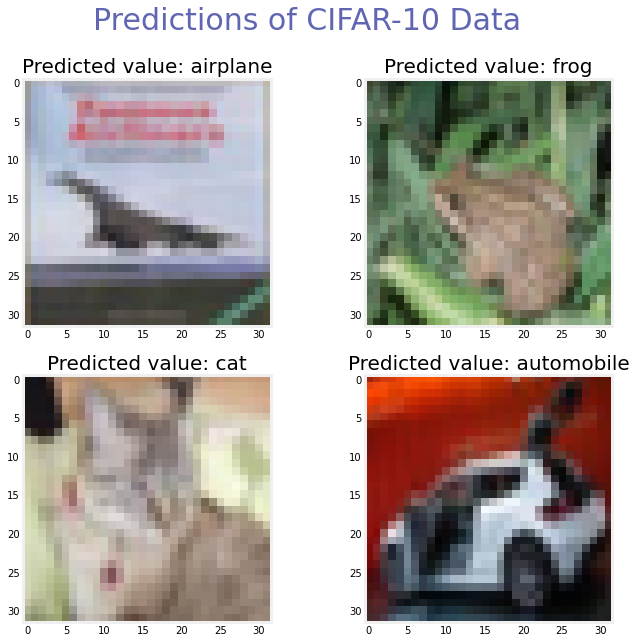

In [11]:
predictions = model.predict(x_test)

plt.figure(figsize=[10,10])

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.subplot(2,2,1)
n = 3
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,2)
n = 4
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,3)
n = 8
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,4)
n = 6
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.suptitle("Predictions of CIFAR-10 Data", size=30, color="#6166B3")

plt.show()

Generating adversarial examples...


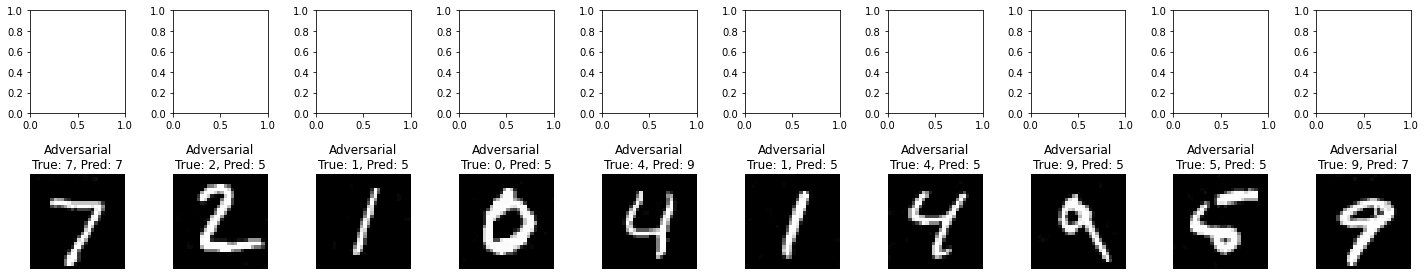

In [8]:
# ----------------------------
# Adversarial Attack (RLAB)
# ----------------------------
PATCH_SIZE = 2
NOISE_LEVEL = 0.02 
MAX_STEPS = 5
TOP_K_PATCHES = 10

def get_patches(img, patch_size):
    h, w = img.shape[:2]
    patches = []
    for i in range(0, h - patch_size + 1, patch_size):
        for j in range(0, w - patch_size + 1, patch_size):
            patches.append((i, j))
    return patches

def apply_patch_noise(img, patches, noise_level):
    new_img = img.copy()
    for (i, j) in patches:
        noise = np.random.normal(0, noise_level, (PATCH_SIZE, PATCH_SIZE))
        new_img[i:i+PATCH_SIZE, j:j+PATCH_SIZE, 0] += noise
    return np.clip(new_img, 0, 1)

def l2_dist(img1, img2):
    return np.linalg.norm(img1 - img2)

def rlab_attack_single(model, original_img, original_label, max_time=3):
    if original_img.ndim == 2:
        original_img = np.expand_dims(original_img, -1)

    patches = get_patches(original_img, PATCH_SIZE)
    curr_img = original_img.copy()
    prob = model.predict(curr_img.reshape(1, 28, 28, 1), verbose=0)[0][original_label]
    l2_prev = 0
    start_time = time.time()

    for step in range(MAX_STEPS):
        if time.time() - start_time > max_time:
            break

        patch_scores = []
        for patch in patches:
            temp_img = apply_patch_noise(curr_img, [patch], NOISE_LEVEL)
            pred = model.predict(temp_img.reshape(1, 28, 28, 1), verbose=0)[0]
            new_prob = pred[original_label]
            l2 = l2_dist(original_img, temp_img)
            score = (prob - new_prob) / (l2 - l2_prev + 1e-8)
            patch_scores.append((score, patch))

        patch_scores.sort(reverse=True, key=lambda x: x[0])
        best_patches = [p for _, p in patch_scores[:TOP_K_PATCHES]]
        temp_img = apply_patch_noise(curr_img, best_patches, NOISE_LEVEL)
        pred = model.predict(temp_img.reshape(1, 28, 28, 1), verbose=0)[0]
        new_label = np.argmax(pred)
        curr_img = temp_img
        prob = pred[original_label]
        l2_prev = l2_dist(original_img, temp_img)

        if new_label != original_label:
            break

    return curr_img

# ----------------------------
# Run RLAB on 10 Test Images
# ----------------------------
num_samples = 10
adv_examples = np.zeros((num_samples, 28, 28, 1))
print("Generating adversarial examples...")
for i in range(num_samples):
    img = x_test[i]
    label = np.argmax(y_test[i])
    adv_img = rlab_attack_single(model, img, label, max_time=2)
    adv_examples[i] = adv_img

# ----------------------------
# Evaluate
# ----------------------------
original_preds = model.predict(x_test[:num_samples], verbose=0)
adv_preds = model.predict(adv_examples, verbose=0)

# ----------------------------
# Visualize
# ----------------------------
fig, axs = plt.subplots(2, num_samples, figsize=(20, 4))
for i in range(num_samples):
    axs[1, i].imshow(adv_examples[i].reshape(28, 28), cmap='gray')
    axs[1, i].set_title(f"Adversarial\nTrue: {np.argmax(y_test[i])}, Pred: {np.argmax(adv_preds[i])}")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()


Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.2870 - accuracy: 0.9140 - val_loss: 0.0848 - val_accuracy: 0.9739
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1155 - accuracy: 0.9650 - val_loss: 0.0573 - val_accuracy: 0.9817
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0903 - accuracy: 0.9726 - val_loss: 0.0455 - val_accuracy: 0.9848
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0755 - accuracy: 0.9767 - val_loss: 0.0448 - val_accuracy: 0.9853
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0657 - accuracy: 0.9794 - val_loss: 0.0391 - val_accuracy: 0.9875
Training with ARBD on 10 images...
Epoch 1/5
1/1 [==============================] - 0s 350ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss:

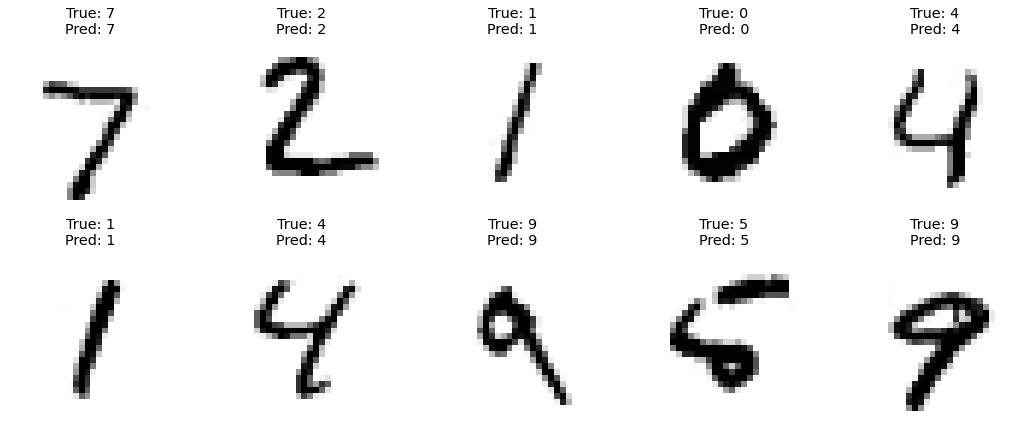

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from scipy.ndimage import median_filter
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# ----------------------------
# Load and Prepare Data
# ----------------------------
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# ----------------------------
# Define Simple CNN Model
# ----------------------------
def create_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()

# ----------------------------
# Train the Model
# ----------------------------
model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test), shuffle=True)

# ----------------------------
# RLAB + ARBD Parameters
# ----------------------------
PATCH_SIZE = 2
NOISE_LEVEL = 0.02
MAX_STEPS = 3
TOP_K_PATCHES = 3

# ----------------------------
# Patch & Utility Functions
# ----------------------------
def get_patches(img, patch_size):
    h, w = img.shape[:2]
    return [(i, j) for i in range(0, h - patch_size + 1, patch_size) for j in range(0, w - patch_size + 1, patch_size)]

def apply_patch_noise(img, patches, noise_level):
    new_img = img.copy()
    for (i, j) in patches:
        noise = np.random.normal(0, noise_level, (PATCH_SIZE, PATCH_SIZE))
        new_img[i:i+PATCH_SIZE, j:j+PATCH_SIZE, 0] += noise
    return np.clip(new_img, 0, 1)

def l2_dist(img1, img2):
    return np.linalg.norm(img1 - img2)

# ----------------------------
# RLAB Attack (with timeout)
# ----------------------------
def rlab_attack_single(model, original_img, original_label, max_time=3):
    start_time = time.time()
    
    # Ensure 3D shape [28, 28, 1]
    if original_img.ndim == 2:
        original_img = np.expand_dims(original_img, -1)

    patches = get_patches(original_img, PATCH_SIZE)
    curr_img = original_img.copy()
    prob = model.predict(curr_img.reshape(1, 28, 28, 1), verbose=0)[0][original_label]
    l2_prev = 0

    for step in range(MAX_STEPS):
        if time.time() - start_time > max_time:
            break

        patch_scores = []
        for patch in patches:
            temp_img = apply_patch_noise(curr_img, [patch], NOISE_LEVEL)
            pred = model.predict(temp_img.reshape(1, 28, 28, 1), verbose=0)[0]
            new_prob = pred[original_label]
            l2 = l2_dist(original_img, temp_img)
            score = (prob - new_prob) / (l2 - l2_prev + 1e-8)
            patch_scores.append((score, patch))

        patch_scores.sort(reverse=True, key=lambda x: x[0])
        best_patches = [p for _, p in patch_scores[:TOP_K_PATCHES]]
        temp_img = apply_patch_noise(curr_img, best_patches, NOISE_LEVEL)
        pred = model.predict(temp_img.reshape(1, 28, 28, 1), verbose=0)[0]
        new_label = np.argmax(pred)
        curr_img = temp_img
        prob = pred[original_label]
        l2_prev = l2_dist(original_img, temp_img)

        if new_label != original_label:
            break

    return curr_img


# ----------------------------
# Feature Squeezing (4-bit + median filter)
# ----------------------------
def feature_squeeze(imgs):
    squeezed = np.floor(imgs * 15) / 15.0
    for i in range(imgs.shape[0]):
        squeezed[i, :, :, 0] = median_filter(squeezed[i, :, :, 0], size=3)
    return squeezed

# ----------------------------
# ARBD Training
# ----------------------------
def train_with_arbd(model, X_train, y_train, num_samples=10, epochs=5, batch_size=32):
    X_adv = np.zeros((num_samples, 28, 28, 1), dtype=np.float32)
    for i in range(num_samples):
        img = X_train[i].reshape(28, 28)
        label = np.argmax(y_train[i])
        adv_img = rlab_attack_single(model, img, label, max_time=3)
        X_adv[i] = adv_img.reshape(28, 28, 1)

    X_squeezed = feature_squeeze(X_train[:num_samples])
    X_adv_squeezed = feature_squeeze(X_adv)
    y_subset = y_train[:num_samples]

    X_combined = np.concatenate([X_squeezed, X_adv_squeezed])
    y_combined = np.concatenate([y_subset, y_subset])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_combined, y_combined, epochs=epochs, batch_size=batch_size)
    return model

# ----------------------------
# Train with ARBD (on 10 images)
# ----------------------------
print("Training with ARBD on 10 images...")
model = train_with_arbd(model, x_train, y_train, num_samples=10)

# ----------------------------
# Generate and Evaluate Adversarial Samples
# ----------------------------
print("Generating RLAB adversarial examples on 10 test samples...")
X_test_adv = np.zeros((10, 28, 28, 1), dtype=np.float32)
for i in range(10):
    orig = x_test[i].reshape(28, 28)
    label = np.argmax(y_test[i])
    X_test_adv[i] = rlab_attack_single(model, orig, label, max_time=3).reshape(28, 28, 1)

loss, acc = model.evaluate(X_test_adv, y_test[:10], verbose=0)
print(f"Accuracy on 10 RLAB adversarial test samples: {acc:.4f}")

# ----------------------------
# Visualize
# ----------------------------
y_pred = model.predict(X_test_adv)
X_test__ = X_test_adv.reshape(10, 28, 28)

fig, axis = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title=f"True: {np.argmax(y_test[i])}\nPred: {np.argmax(y_pred[i])}")
    ax.axis("off")
plt.tight_layout()
plt.show()
